# Data Preparation in SciKit-Learn
----

## Getting started
Same as before, we will need to import a few Python libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Next** we will load our data as a Pandas DataFrame

In [59]:
df = pd.read_csv('Trade_of_Goods.csv') #.drop(['Unnamed: 1', 'Scale'], axis=1)
df.head(10)

,Indicator,2008Q1,2008M01,2008M02,2008M03,2008Q2,2008M04,2008M05,2008M06,2008Q3,...,2017M05,2017M06,2017Q3,2017M07,2017M08,2017M09,2017Q4,2017M10,2017M11,2017M12
0,Value of Exports (USD),18208.32,5611.90,6126.16,6417.48,22195.15,7215.71,7379.67,7595.95,23482.44,...,7731.84,7901.21,22621.02,7058.30,7799.19,7761.13,23750.44,7601.50,8264.55,7874.08
1,Value of Exports (ZAR),137454.04,39356.82,46946.33,51150.89,172574.72,56174.34,56240.45,60159.93,182726.44,...,102718.94,102061.56,298052.50,92702.85,103199.17,102150.48,324711.67,104205.42,116185.99,104320.26
2,"Value of Imports, CIF (USD)",24270.97,8105.11,8159.43,8010.87,26569.46,9112.97,9090.14,8379.54,28479.80,...,7527.94,7434.06,22276.71,6738.95,7724.11,7810.59,22454.39,7661.57,7704.40,7068.85
3,"Value of Imports, CIF (ZAR)",183220.84,56841.94,62527.78,63851.12,206586.40,70944.49,69275.97,66365.94,221612.91,...,100010.03,96027.32,293515.86,88508.58,102205.79,102801.49,306992.36,105028.95,108311.23,93652.18
4,"Value of Imports, FOB (ZAR)",158520.35,49573.22,52766.09,56181.04,184412.87,66169.00,57900.04,60343.84,209293.22,...,95498.90,91442.97,278835.70,83728.44,97375.40,97731.86,291510.04,99781.01,103132.84,88596.19
5,"Value of Imports, FOB (USD)",20998.94,7068.66,6885.60,7048.57,23717.68,8499.55,7597.43,7619.17,26896.58,...,7188.38,7079.16,21162.54,6375.00,7359.06,7425.41,21321.96,7278.75,7336.05,6687.23


In [60]:
for col in df.columns:
    if 'M' not in col and col != 'Indicator':
        df = df.drop(col, axis=1)

df.head(10)

,Indicator,2008M01,2008M02,2008M03,2008M04,2008M05,2008M06,2008M07,2008M08,2008M09,...,2017M03,2017M04,2017M05,2017M06,2017M07,2017M08,2017M09,2017M10,2017M11,2017M12
0,Value of Exports (USD),5611.90,6126.16,6417.48,7215.71,7379.67,7595.95,8034.45,7882.49,7579.28,...,7821.60,6735.02,7731.84,7901.21,7058.30,7799.19,7761.13,7601.50,8264.55,7874.08
1,Value of Exports (ZAR),39356.82,46946.33,51150.89,56174.34,56240.45,60159.93,61268.16,60390.94,61067.34,...,101206.02,91009.21,102718.94,102061.56,92702.85,103199.17,102150.48,104205.42,116185.99,104320.26
2,"Value of Imports, CIF (USD)",8105.11,8159.43,8010.87,9112.97,9090.14,8379.54,10589.92,8995.88,8928.30,...,7262.78,6649.22,7527.94,7434.06,6738.95,7724.11,7810.59,7661.57,7704.40,7068.85
3,"Value of Imports, CIF (ZAR)",56841.94,62527.78,63851.12,70944.49,69275.97,66365.94,80755.37,68921.01,71936.53,...,93975.25,89849.76,100010.03,96027.32,88508.58,102205.79,102801.49,105028.95,108311.23,93652.18
4,"Value of Imports, FOB (ZAR)",49573.22,52766.09,56181.04,66169.00,57900.04,60343.84,75599.59,65514.39,68179.24,...,89666.19,86069.05,95498.90,91442.97,83728.44,97375.40,97731.86,99781.01,103132.84,88596.19
5,"Value of Imports, FOB (USD)",7068.66,6885.60,7048.57,8499.55,7597.43,7619.17,9913.82,8551.23,8461.97,...,6929.76,6369.43,7188.38,7079.16,6375.00,7359.06,7425.41,7278.75,7336.05,6687.23


In [61]:
df = df.transpose()
df = df.rename(columns=df.iloc[0]).drop(df.index[0])

In [62]:
df.head()

,Value of Exports (USD),Value of Exports (ZAR),"Value of Imports, CIF (USD)","Value of Imports, CIF (ZAR)","Value of Imports, FOB (ZAR)","Value of Imports, FOB (USD)"
2008M01,5611.9,39356.8,8105.11,56841.9,49573.2,7068.66
2008M02,6126.16,46946.3,8159.43,62527.8,52766.1,6885.6
2008M03,6417.48,51150.9,8010.87,63851.1,56181,7048.57
2008M04,7215.71,56174.3,9112.97,70944.5,66169,8499.55
2008M05,7379.67,56240.4,9090.14,69276,57900,7597.43


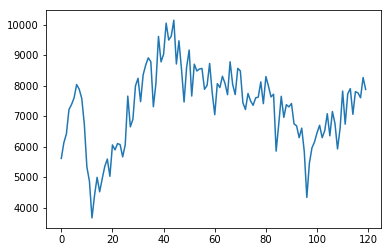

In [63]:
plt.plot(np.arange(len(df.index)), df.iloc[:,0].values)
plt.show()

In [64]:
df.to_csv('Trade_clean.csv')